# Solution (Q9-13)

# Question 9

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "drive/MyDrive/232E/"

In [ ]:
!pip install igraph

!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for cairocffi: filename=cairocffi-1.5.1-py3-none-any.whl size=90523 sha256=9ec11e694a59c8f7f09510bd2016dd16a5d76169e1d1bca1c9a93c1df5dec031
  Stored in directory: /root/.cache/pip/wheels/3d/f0/15/e20ff54ef59ec58a08e230bd3874e6f412b09e6a3093f856a7
Successfully built cairocffi


In [ ]:
from igraph import *
import json
import random
import numpy as np
from numpy import linalg 
import itertools
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay  # needed for triangulation
import os
import pandas as pd
from copy import deepcopy
from tqdm import tqdm
import networkx as nx
import pandas as pd
import igraph

In [ ]:
random.seed(2022)
np.random.seed(2022)

In [ ]:
# Reading Geo Boundaries
with open(file_path+'los_angeles_censustracts.json') as f:
    census_tracts = json.loads(f.readline())

In [ ]:
(len(census_tracts['features']))

2716

In [ ]:
census_tracts['features'][0]['properties']

{'MOVEMENT_ID': '1', 'TRACT': '480302', 'DISPLAY_NAME': 'Census Tract 480302'}

In [ ]:
# Mean value for centroid

print (np.array(census_tracts['features'][0]['geometry']['coordinates'][0]).mean(axis=0))  # [longitude, latitude]

print (np.array(census_tracts['features'][0]['geometry']['coordinates'][0]))

[-118.12053321   34.10309557]
[[-118.11683    34.107225]
 [-118.116311   34.10648 ]
 [-118.115782   34.106729]
 [-118.115717   34.106606]
 [-118.115696   34.106563]
 [-118.115653   34.106468]
 [-118.115613   34.106402]
 [-118.115488   34.10611 ]
 [-118.115409   34.10611 ]
 [-118.11532    34.106112]
 [-118.115171   34.106113]
 [-118.115174   34.106068]
 [-118.115174   34.105996]
 [-118.11517    34.105924]
 [-118.115157   34.105829]
 [-118.115142   34.105758]
 [-118.115125   34.105696]
 [-118.115762   34.105696]
 [-118.115543   34.105381]
 [-118.113094   34.101877]
 [-118.11306    34.10185 ]
 [-118.112989   34.101707]
 [-118.114592   34.100991]
 [-118.114876   34.100861]
 [-118.116693   34.099987]
 [-118.117786   34.099464]
 [-118.120994   34.097937]
 [-118.12254    34.097193]
 [-118.124152   34.096419]
 [-118.125194   34.095935]
 [-118.126868   34.09516 ]
 [-118.127179   34.095604]
 [-118.127898   34.096637]
 [-118.12827    34.097221]
 [-118.128556   34.097623]
 [-118.128613   34.097689

In [ ]:
"""
Each vertix is defined by the mean of the values of its polygon region coordinates
"""

display_names = dict()
coordinates = dict()

for area in census_tracts['features']:
    id = int(area['properties']['MOVEMENT_ID'])
    display_name = area['properties']['DISPLAY_NAME']
    display_names[id] = display_name
    a = area['geometry']['coordinates'][0]
    coordinates[id] = np.array(a if type(a[0][0]) == float else a[0]).mean(axis=0) # If float then its essentially the same as above cell for mean

In [ ]:
# coordinates

In [ ]:
for i in range(5):
    key = i + 1
    print('{}: {}, {}'.format(key, display_names[key], coordinates[key]))

1: Census Tract 480302, [-118.12053321   34.10309557]
2: Census Tract 480303, [-118.13785063   34.09645121]
3: Census Tract 480304, [-118.13138209   34.09626386]
4: Census Tract 480400, [-118.13224544   34.10349303]
5: Census Tract 480500, [-118.14492317   34.0986815 ]


In [ ]:
display_names.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [ ]:
"""
Making the base of the graph object
Adding a particular number of vertices

Vertex properties:
- Display name
- Coordinates
"""

g = Graph(directed=False)
g.add_vertices(len(display_names))
g.vs['display_name'] = list(display_names.values())  # index = id - 1
g.vs['coordinates'] = list(coordinates.values())

In [ ]:
""" 
December only weights
- Undirected edges
- Combined weight values
"""
file_aggregate_data = 'los_angeles-censustracts-2019-4-All-MonthlyAggregate.csv'
month_filter = {12}  # for monthly aggregate data of 4th quarter, we can filter data based off of only December

edges = []
weights = []

with open(file_path+'los_angeles-censustracts-2019-4-All-MonthlyAggregate.csv') as f:
    f.readline()  # skip the first line
    
    while True:
        line = f.readline()
        if line == '':
            break  # end of file
        
        vals = line.strip().split(',')
        
        # read edge info
        src, dest, month, dist = int(vals[0]), int(vals[1]), int(vals[2]), float(vals[3])

        # if data is not relevant, skip it
        if month not in month_filter:
            continue
            
        edges.append((src - 1, dest - 1))
        weights.append(dist)  

In [ ]:
g.add_edges(edges)
g.es['weight'] = weights
del edges, weights

In [ ]:
print("Number of nodes: ", len(g.vs))
print ("Number of edges: ", len(g.es))

Number of nodes:  2716
Number of edges:  1692450


In [ ]:
"""
Pruning network based on criteria mentioned
"""

# keep only the giant connected component
components = g.components()
gcc = max(components, key=len)
vs_to_delete = [i for i in range(len(g.vs)) if i not in gcc]
g.delete_vertices(vs_to_delete)

# remove duplicate edges
g = g.simplify(combine_edges=dict(weight='mean'))  # combine duplicate edges

In [ ]:
print("Number of nodes: ", len(g.vs))
print ("Number of edges: ", len(g.es))



Number of nodes:  2649
Number of edges:  1003858


In [ ]:
complete_df = g.get_edge_dataframe()
complete_df.head()

source  target   weight
edge ID                         
0             0       1  250.180
1             0       2  129.765
2             0       3  137.050
3             0       4  309.470
4             0       5  413.200

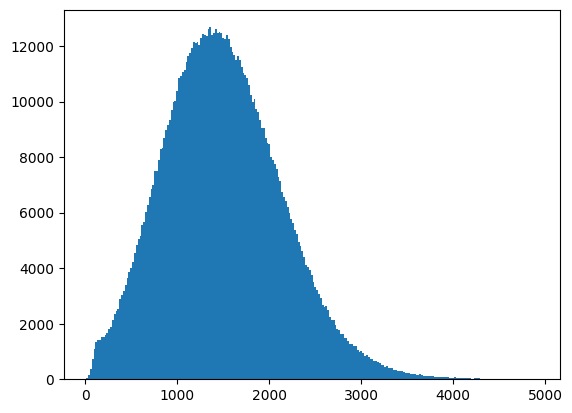

In [ ]:
import matplotlib.pyplot as plt
weights = g.es['weight']
binwidth = 20
bins = np.arange(min(weights), max(weights) + binwidth, binwidth)
plt.hist(weights, bins=bins)
plt.show()

# Question 10

In [ ]:
""" Running minimum spanning tree """
mst = g.spanning_tree(weights=g.es['weight'])

In [ ]:
edf = mst.get_edge_dataframe()
edf.head()

source  target   weight
edge ID                         
0             0       2  129.765
1             0      13  118.335
2             1       2   90.235
3             1       3  126.475
4             1       9  125.675

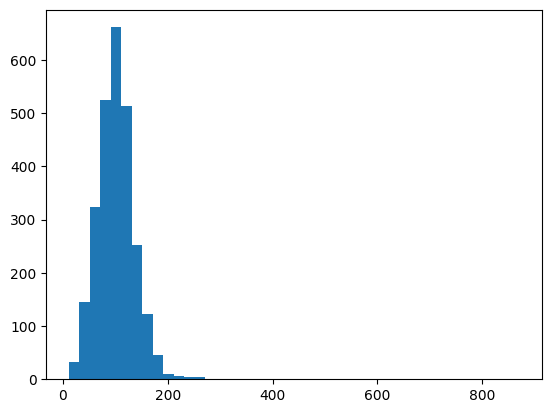

In [ ]:
""" The edge weight distribution for MST """
import matplotlib.pyplot as plt
weights = mst.es['weight']
binwidth = 20
bins = np.arange(min(weights), max(weights) + binwidth, binwidth)
plt.hist(weights, bins=bins)
plt.show()

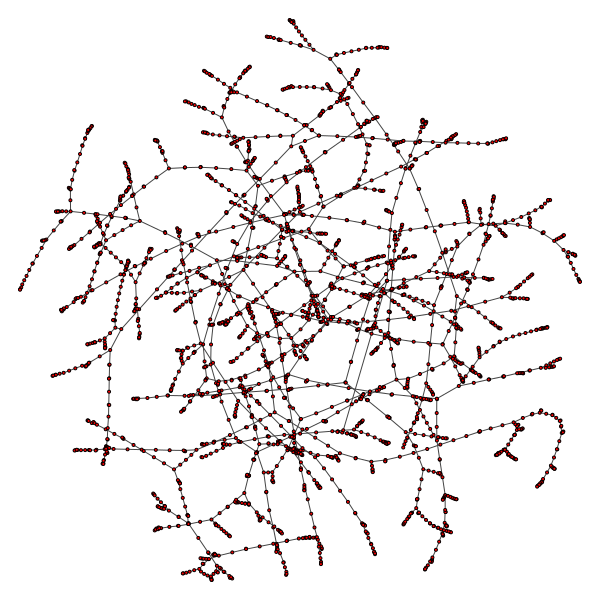

In [ ]:
visual_style = {}
visual_style["vertex_size"] = 3
igraph.plot(mst,"MST.png",**visual_style)

In [ ]:
count = 0
for i, e in enumerate(mst.es):
    if i %50==0:
      print('Distance in miles: {:.3f}\nTime taken: {:.1f}\n---------\n'.format(linalg.norm(mst.vs[e.source]['coordinates'] - mst.vs[e.target]['coordinates'])* 69, e['weight']))
      print("Coordinates are for Source",(mst.vs[e.source]['coordinates']," Coordinates for Destination are ",mst.vs[e.target]['coordinates']))
      count+=1
    if(count>5):
      break

Distance in miles: 0.885
Time taken: 129.8
---------

Coordinates are for Source (array([-118.12053321,   34.10309557]), ' Coordinates for Destination are ', array([-118.13138209,   34.09626386]))
Distance in miles: 0.509
Time taken: 119.9
---------

Coordinates are for Source (array([-118.08062876,   33.86132792]), ' Coordinates for Destination are ', array([-118.07799459,   33.85443324]))
Distance in miles: 0.357
Time taken: 87.1
---------

Coordinates are for Source (array([-118.19460307,   33.98065181]), ' Coordinates for Destination are ', array([-118.19844176,   33.97718283]))
Distance in miles: 0.486
Time taken: 137.0
---------

Coordinates are for Source (array([-118.3118506 ,   34.20150542]), ' Coordinates for Destination are ', array([-118.31874364,   34.20006951]))
Distance in miles: 1.667
Time taken: 117.3
---------

Coordinates are for Source (array([-118.27451758,   33.84265016]), ' Coordinates for Destination are ', array([-118.25471093,   33.82882159]))
Distance in mile

# TSP Approximation

# Question 11

### Check Traingle Inequality

In [ ]:
def is_triangle(sides):
    if (sides[0] + sides[1] <= sides[2] or 
        sides[1] + sides[2] <= sides[0] or 
        sides[0] + sides[2] <= sides[1]):
        return False
    return True 

print('Test:', is_triangle([1,4,2]), is_triangle([3,5,3]))

Test: False True


In [ ]:
g.vs['coordinates'][:10]

[array([-118.12053321,   34.10309557]),
 array([-118.13785063,   34.09645121]),
 array([-118.13138209,   34.09626386]),
 array([-118.13224544,   34.10349303]),
 array([-118.14492317,   34.0986815 ]),
 array([-118.1528085,   34.098628 ]),
 array([-118.15075124,   34.08341963]),
 array([-118.15266639,   34.09029573]),
 array([-118.15023891,   34.09595766]),
 array([-118.14184446,   34.08538654])]

In [ ]:
# from igraph import matrix
# g.cliques(min=3,max=3)
g.get_eid(0,200, error=False)

-1

In [ ]:
def sample_triangles(g, n_samples):
    """
    Function will pick up three nodes in the graph such that each have an edge between them. 
    So the triangle property can be judged properly
    The method samples two edges 
    """
    
    result = []
    #result will have tuple of the the vertices of a triangle 
    total_count = 0

    temp = list(range(0,len(g.vs)))
    while total_count < n_samples:
        sampled_edges = random.choices(temp, k=3)
        e1 = g.get_eid(sampled_edges[0],sampled_edges[1], error=False)
        e2 = g.get_eid(sampled_edges[1],sampled_edges[2], error=False)
        e3 = g.get_eid(sampled_edges[2],sampled_edges[0], error=False)
        if e1 != -1 and e2 != -1 and e3 != -1:
            total_count += 1
            result.append(sampled_edges)
    return result 

sampled = sample_triangles(g, 10)
sampled

[[1595, 1024, 800],
 [2381, 1614, 1343],
 [2199, 1183, 2519],
 [185, 269, 1208],
 [130, 892, 1021],
 [1697, 308, 297],
 [683, 2443, 2028],
 [1788, 1221, 516],
 [1562, 2341, 1979],
 [2204, 1223, 1127]]

In [ ]:
# g.es.select(_between=([0], [1]))

In [ ]:
n_samples = 1000  # WARNING: this might take a minute for larger sample sizes
triangles = 0
sampled = sample_triangles(g, n_samples)

for triangle_vs in sampled:
    
    edge_lengths = []
    
    for i in range(3):
        for j in range(i):
            edge_lengths.append(min(g.es.select(_between=([triangle_vs[i]], [triangle_vs[j]]))['weight']))   
            
    triangles += is_triangle(edge_lengths)
    
print('Triangle inequality holds by {}%'.format(round(100.0 * triangles / n_samples, 1)))

Triangle inequality holds by 92.0%


# Question 12

In [ ]:
mygraph =pd.read_csv(file_path+"los_angeles-censustracts-2019-4-All-MonthlyAggregate.csv",usecols=['sourceid', 'dstid', 'mean_travel_time', 'month'])
mygraph = mygraph[mygraph['month']==12][['sourceid','dstid','mean_travel_time']]

numpy_graph=  mygraph.values
print(mygraph)

         sourceid  dstid  mean_travel_time
2             758    972            953.55
5            1197   2006           1213.18
6            2652    620            828.92
7            2427   2693           1742.80
8            2653    610            699.03
...           ...    ...               ...
5144054      1122    893           1167.77
5144056      1169    423           1328.88
5144057      1116    953           1336.86
5144059      1167    443           1467.28
5144061      1127    843           1226.04

[1692450 rows x 3 columns]


### Actual Data

In [ ]:
node_nodelist = {}

for i in numpy_graph:
    data = tuple(np.sort([int(i[0]),int(i[1])]))
    if data in node_nodelist:
        node_nodelist[data].append(i[2])
    else:
        node_nodelist[data]=[i[2]]



In [ ]:
node_nodelist

{(758, 972): [953.55, 1017.2],
 (1197, 2006): [1213.18, 1033.65],
 (620, 2652): [828.92, 737.1],
 (2427, 2693): [1742.8],
 (610, 2653): [699.03, 806.37],
 (408, 1508): [648.42, 935.54],
 (757, 982): [1250.79, 1306.68],
 (1562, 2337): [1780.65, 1342.93],
 (1246, 1273): [627.75, 564.62],
 (767, 882): [932.8, 969.83],
 (351, 2078): [2062.97, 2051.52],
 (1620, 1757): [2563.37],
 (1167, 2306): [1906.58, 1819.89],
 (1027, 1693): [1086.16, 785.73],
 (436, 1228): [1208.05, 1120.7],
 (1266, 1271): [229.29, 204.52],
 (762, 779): [716.71, 635.94],
 (1585, 2107): [1789.27, 1433.47],
 (348, 2108): [2013.51, 1888.77],
 (1252, 1456): [1301.92, 1278.43],
 (1600, 1957): [968.74, 1076.24],
 (428, 1308): [1674.81],
 (1553, 2427): [1454.65, 1135.13],
 (1257, 1406): [1420.52, 1359.93],
 (325, 2338): [1838.39, 1965.14],
 (414, 2054): [1035.47, 1277.23],
 (407, 2124): [1941.64, 2030.33],
 (409, 2104): [2698.44, 3053.73],
 (412, 2074): [2620.66, 2685.95],
 (509, 1104): [2026.26, 2040.31],
 (1195, 2026): [897.

### Measureing Relative Performance Guarantee

In [ ]:
with open(file_path+"to_edgelist.txt",'w') as f:
  for i in node_nodelist:
    f.write('{} {} {:.6f}\n'.format(i[0], i[1], np.mean(node_nodelist[i])))

269084.5449999998


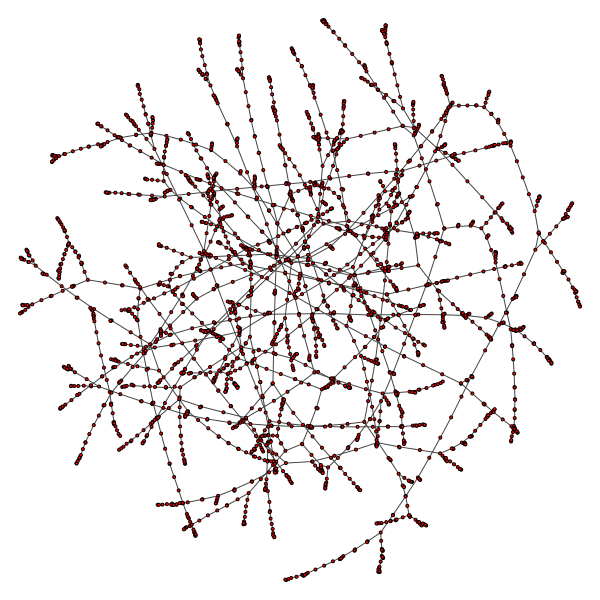

In [ ]:
average_transit_time_graph = Graph.Read(file_path+"to_edgelist.txt",format="ncol",directed=False)
giant_connected_component = average_transit_time_graph.components().giant()
mst = giant_connected_component.spanning_tree(weights = giant_connected_component.es["weight"])
print(sum(mst.es['weight']))
visual_style = {}
visual_style["vertex_size"] = 3
igraph.plot(mst,**visual_style)

In [ ]:
np_graph = numpy_graph
print(np_graph)
for i in tqdm(range(0,len(numpy_graph))):
    if(np_graph[i][0]>np_graph[i][1]):
        temp = numpy_graph[i][0]
        numpy_graph[i][0] = numpy_graph[i][1]
        numpy_graph[i][1]=temp


[[ 758.    972.    953.55]
 [1197.   2006.   1213.18]
 [2652.    620.    828.92]
 ...
 [1116.    953.   1336.86]
 [1167.    443.   1467.28]
 [1127.    843.   1226.04]]


100%|██████████| 1692450/1692450 [00:02<00:00, 599686.04it/s]


In [ ]:

df = pd.DataFrame(numpy_graph)
df_v1 = df.groupby([0,1]).mean().reset_index()
df_v1 = df_v1.rename(columns={0:"source",1:"target",2:"cost"})
print(df_v1)


         source  target     cost
0           1.0     2.0  250.180
1           1.0     3.0  129.765
2           1.0     4.0  137.050
3           1.0     5.0  309.470
4           1.0     6.0  413.200
...         ...     ...      ...
1004950  2707.0  2708.0  104.150
1004951  2708.0  2711.0   70.680
1004952  2713.0  2714.0  156.480
1004953  2713.0  2715.0  291.660
1004954  2714.0  2715.0  124.405

[1004955 rows x 3 columns]


In [ ]:
graph = nx.from_pandas_edgelist(df_v1,'source','target','cost')

In [ ]:
connected_graph = graph.subgraph(max(nx.connected_components(graph),key=len))

In [ ]:
print(connected_graph)

Graph with 2649 nodes and 1004955 edges


In [ ]:
mst= nx.minimum_spanning_tree(connected_graph,weight='cost')

In [ ]:
directional_mst = nx.MultiGraph()
mst_cost = 0
for i in mst.edges:
    cost = mst.edges[i[0],i[1]]['cost']
    mst_cost+=cost
    directional_mst.add_edge(i[0],i[1],weight=cost)
    directional_mst.add_edge(i[0],i[1],weight=cost)


visited_vertices = []
count = 0
for i in directional_mst.nodes:
    visited_vertices.append(i)
    count+=1
    if(count>60):
        break

In [ ]:
print(mst_cost)

269084.54500000016


In [ ]:
print(visited_vertices)

[1.0, 14.0, 3.0, 2.0, 10.0, 4.0, 13.0, 5.0, 9.0, 6.0, 1676.0, 2015.0, 7.0, 8.0, 11.0, 12.0, 18.0, 22.0, 15.0, 1936.0, 1757.0, 16.0, 17.0, 19.0, 1758.0, 1756.0, 20.0, 21.0, 1760.0, 23.0, 29.0, 24.0, 1972.0, 25.0, 2279.0, 26.0, 27.0, 28.0, 36.0, 1731.0, 30.0, 32.0, 31.0, 33.0, 2258.0, 1738.0, 34.0, 37.0, 35.0, 2259.0, 2019.0, 52.0, 51.0, 53.0, 58.0, 311.0, 76.0, 59.0, 60.0, 2194.0, 62.0]


In [ ]:
len(connected_graph)

2649

In [ ]:
distance_table = nx.floyd_warshall_numpy(connected_graph,weight='cost')


In [ ]:
print(distance_table.shape)

(2649, 2649)


In [ ]:
v_list = list(connected_graph.nodes)
def lookup_v(node):
    return v_list.index(node)

In [ ]:
cost_for_each_circuit = []
possible_circuits = []
for i in tqdm(visited_vertices):
    circuit = [u for u,v in nx.eulerian_circuit(directional_mst,source=i)]
    visited_nodes = set()
    trajectory = []
    for j in circuit:
        if j not in visited_nodes:
            trajectory.append(j)
            visited_nodes.add(j)
    trajectory.append(trajectory[0])
    possible_circuits.append(trajectory)
    cost_of_path = 0
    for k in range(0,len(trajectory)-1):
        node0,node1= trajectory[k],trajectory[k+1]
        if(mst.has_edge(node0,node1)):
            cost_of_path+=mst.edges[node0,node1]['cost']
        else:
            index0 = lookup_v(node0)
            index1 = lookup_v(node1)
            cost_of_path+=distance_table[index0,index1]
    cost_for_each_circuit.append(cost_of_path)

min_cost = min(cost_for_each_circuit)
min_cost_index=  np.argmin(cost_for_each_circuit)
santa_path = possible_circuits[min_cost_index]





100%|██████████| 61/61 [00:07<00:00,  7.99it/s]


<hr><b><font color="red">WARNING: SLOW!</font></b>

In [ ]:
tsp_cost = min_cost
print('MST Cost:', round(mst_cost))
print('TSP Cost:', round(tsp_cost))
print('Ratio:', round(tsp_cost/mst_cost, 2))

MST Cost: 269085
TSP Cost: 421489
Ratio: 1.57


---
TSP results should resemble the following figure

In [ ]:
def convert_to_numpy(x):
    return np.asarray(x).mean(axis=0)

In [ ]:
print(santa_path)

[13.0, 3.0, 2.0, 4.0, 5.0, 9.0, 8.0, 7.0, 6.0, 2015.0, 2014.0, 2013.0, 2010.0, 1060.0, 1186.0, 1059.0, 1062.0, 1177.0, 1063.0, 1178.0, 1172.0, 1687.0, 1218.0, 1227.0, 1171.0, 1170.0, 1230.0, 1223.0, 1229.0, 1228.0, 1224.0, 1235.0, 1254.0, 1255.0, 1258.0, 1257.0, 1256.0, 1288.0, 1287.0, 1289.0, 1292.0, 1291.0, 1294.0, 1295.0, 1296.0, 1293.0, 1290.0, 1286.0, 1308.0, 1307.0, 1306.0, 1304.0, 1305.0, 1362.0, 1363.0, 1336.0, 1361.0, 1359.0, 1360.0, 1309.0, 1248.0, 1251.0, 1249.0, 1250.0, 1253.0, 1252.0, 1236.0, 1238.0, 1241.0, 1240.0, 1237.0, 1246.0, 1247.0, 1245.0, 1244.0, 1265.0, 1242.0, 1266.0, 1267.0, 1243.0, 1263.0, 1382.0, 1385.0, 1386.0, 1381.0, 1388.0, 1379.0, 1414.0, 1422.0, 1426.0, 1425.0, 1424.0, 1433.0, 1472.0, 1474.0, 1475.0, 1476.0, 1477.0, 2366.0, 1478.0, 1483.0, 1484.0, 1485.0, 1486.0, 1493.0, 1492.0, 2370.0, 1507.0, 1506.0, 1505.0, 1510.0, 2372.0, 2369.0, 2368.0, 2367.0, 1473.0, 1479.0, 1480.0, 1481.0, 1482.0, 1487.0, 1423.0, 1402.0, 1403.0, 1411.0, 1412.0, 1404.0, 1410.0, 1

In [ ]:
geo_data = json.load(open(file_path+'los_angeles_censustracts.json'))

trajectory = []
for i in tqdm(santa_path):
    for j in range(len(geo_data['features'])):
        if(geo_data['features'][j]['properties']['MOVEMENT_ID']==str(int(i))):
            location = geo_data['features'][j]['geometry']['coordinates'][0]
            if(len(location)==1):
                trajectory.append(convert_to_numpy(location[0]))
            elif(len(location)==2):
                trajectory.append(convert_to_numpy(location[0]+location[1]))
            elif i==1932.0:
                trajectory.append(convert_to_numpy(location[0]+location[1]+location[2]+location[3]+location[4]+location[5]))
            else:
                trajectory.append(convert_to_numpy(location))
x_coord = [i[0] for i in trajectory]
y_coord = [i[1] for i in trajectory]

100%|██████████| 2650/2650 [00:06<00:00, 406.87it/s]


In [ ]:
Bbox = ((-118.75,-117.75,33.7,34.4))## Latitude and Longtitude values used when exporting from openstreetmap.org

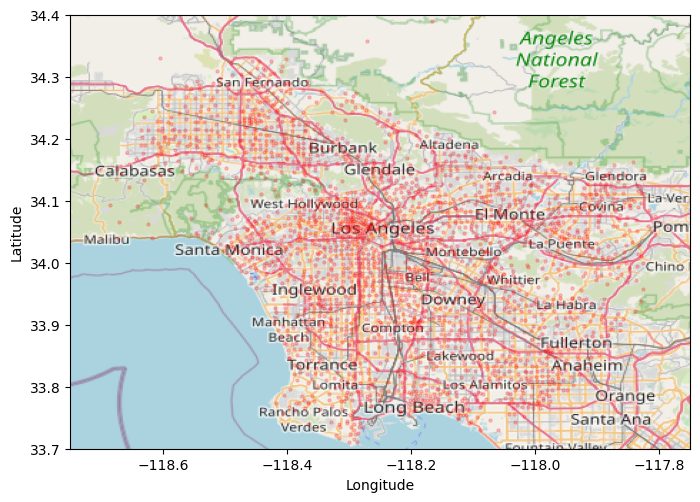

In [ ]:
la_image = plt.imread(file_path+"Los_Angeles_Open_Streetmap.png")
plt.figure(figsize=(8,7))
plt.scatter(x_coord,y_coord,zorder=1,alpha=0.2,c='r',s=5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(Bbox[0],Bbox[1])
plt.ylim(Bbox[2],Bbox[3])
plt.imshow(la_image,zorder=0,extent=Bbox,aspect='equal')
plt.show()

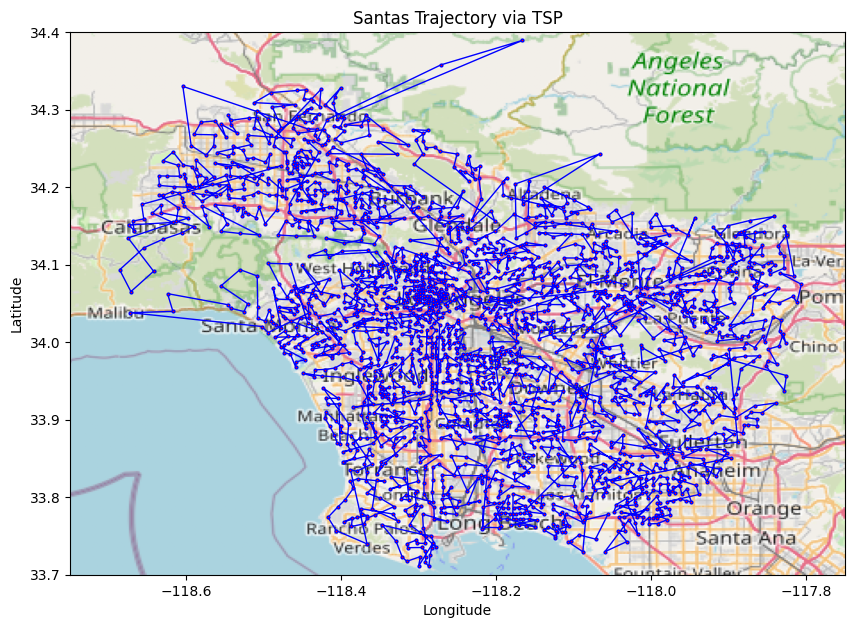

In [ ]:
la_image = plt.imread(file_path+"Los_Angeles_Open_Streetmap.png")
plt.figure(figsize=(10,10))
plt.plot(x_coord,y_coord,color='blue',marker='o',markersize=2,markerfacecolor='red',linewidth=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Santas Trajectory via TSP")
plt.xlim(Bbox[0],Bbox[1])
plt.ylim(Bbox[2],Bbox[3])
plt.imshow(la_image,zorder=0,extent=Bbox,aspect="equal")
plt.show()

In [ ]:
for i in range(0,5):
        print(x_coord[i],y_coord[i])

-118.12911933333332 34.08759475
-118.13138209090911 34.09626386363636
-118.13785063157897 34.09645121052631
-118.13224544444446 34.10349303174603
-118.14492316666666 34.098681500000005


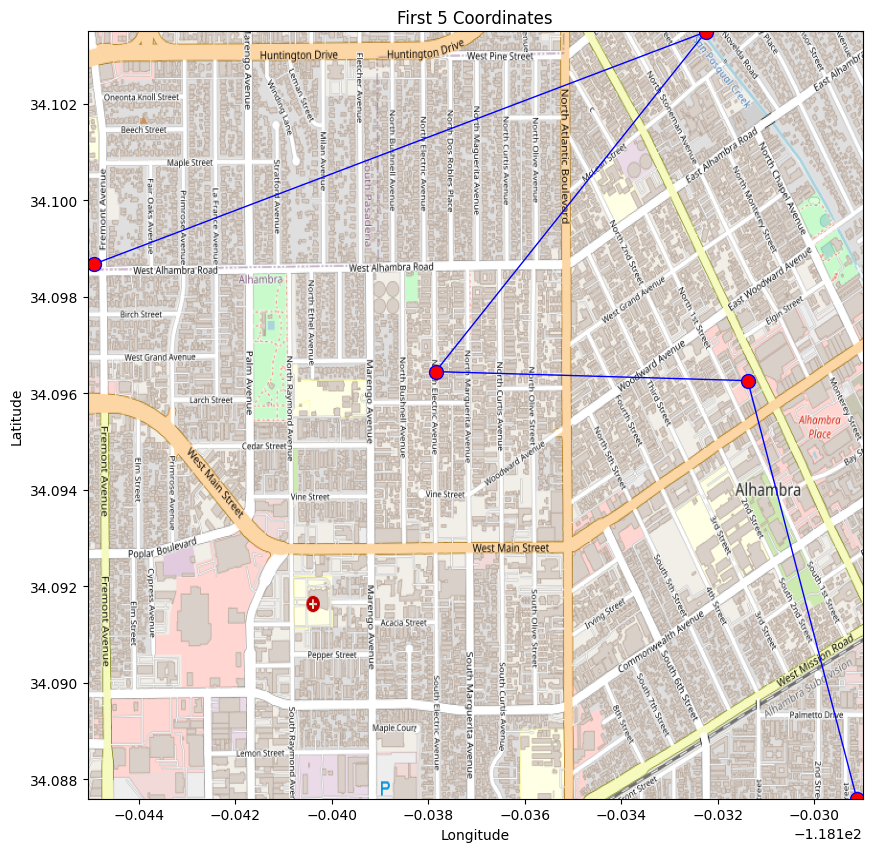

In [ ]:
Bbox = ((-118.14506,-118.129,34.0876,34.1035))

zoomed_la= plt.imread(file_path+"Starting_points.png")
plt.figure(figsize=(10,10))
plt.plot(x_coord[:5],y_coord[:5],color='blue',marker='o',markersize=10,markerfacecolor='red',linewidth=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("First 5 Coordinates")
plt.imshow(zoomed_la,zorder=0,aspect="equal",extent=Bbox)
plt.show()